In [6]:
import networkx as nx
from tqdm import tqdm
from pprint import pprint
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import community

In [7]:
path = "./tests/new_tweets/"

In [8]:
files = [i for i in os.listdir(path) if os.path.isfile(path+i) and ".json" in i]

In [9]:
with_replies = []
for file in tqdm(files):
    
    tweet = json.load(open(path+file))
    if tweet["in_reply_to_status_id"] != None:
        with_replies.append(file)

100%|████████████████████████████████████████████████████████████████████████████| 1686/1686 [00:01<00:00, 1507.05it/s]


In [10]:
# pprint(json.load(open(path+'1430024152518430720.json')))

In [11]:
len(with_replies)

901

In [12]:
# pprint(json.load(open(path+files[0])))

In [170]:
# network = nx.DiGraph()
network = nx.MultiDiGraph()

In [171]:
lst = [i for i in range(1,21)]

In [172]:
edge_keeper = {}

In [173]:
edge_keeper[(1,2,"retweet")]=0
network.add_edge(1, 2, key=edge_keeper[(1,2,"retweet")] , kind="retweet", weight=1)
edge_keeper[(1,2,"reply")]=1
network.add_edge(1, 2, key=edge_keeper[(1,2,"reply")], kind="reply", weight=1)
edge_keeper[(1,2,"quote")]=2
network.add_edge(1, 2, key=edge_keeper[(1,2,"quote")], kind="quote", weight=1)

2

In [182]:
edge_keeper[(1,2,"javad")]=20

In [174]:
network.edges[1,2,edge_keeper[(1,2,"retweet")]]["weight"] += 1

In [175]:
network.edges[1,2,edge_keeper[(1,2,"retweet")]]["weight"]

2

In [183]:
network.has_edge(1,2,key=edge_keeper[(1,2,"javad")])

False

In [167]:
nx.write_gexf(network, path="./n10.gml")

In [166]:
network.edges()

OutMultiEdgeDataView([(1, 2), (1, 2), (1, 2)])

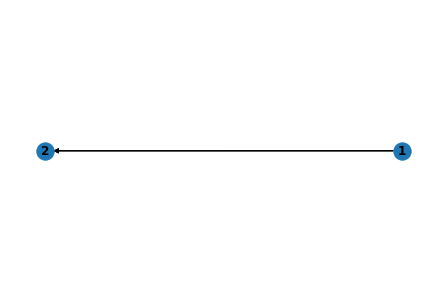

In [57]:
nx.draw_circular(network, with_labels=True, font_weight='bold')

In [98]:
# G1 = nx.DiGraph()
G2 = nx.MultiDiGraph()

In [102]:
G2.add_edge(1, 2, key="quote")
G2.add_edge(1, 2 , key="retweet")
G2.add_edge(1, 3, key="reply")
G2.add_edge(3, 1 , key="retweet")
G2.add_edge(3, 4 , key="reply")
G2.add_edge(3, 4 , key="quote")
G2.add_edge(4, 3 , key="quote")
G2.add_node(5)
G2.add_node(6)

In [105]:
G2.edges[1,2, "quote"]["weight"] = 2
G2.edges[1,2, "retweet"]["weight"] = 1
G2.edges[1,3, "reply"]["weight"] = 1
G2.edges[3,1, "retweet"]["weight"] = 3
G2.edges[3,4, "reply"]["weight"] = 1
G2.edges[3,4, "quote"]["weight"] = 2
G2.edges[4,3, "quote"]["weight"] = 2

In [164]:
nx.write_gexf(G2, path="./n9.gexf")

In [100]:
G2.add_edge(1, 2, key="quote")

'quote'

In [95]:
G2.edges[1,2, "reply"]["weight"] += 1

In [96]:
G2.edges[1,2, "reply"]

{'weight': 2}

In [58]:
network.edges

OutMultiEdgeView([(1, 2, 0), (1, 2, 1), (1, 2, 2)])

In [46]:
network.add_edge(1, 2, kind="reply")
network.add_edge(2, 3, kind="reply")
network.add_edge(4, 3, kind="reply")
network.add_edge(5, 6, kind="reply")
network.add_edge(3, 5, kind="reply")
network.add_edge(7, 8, kind="reply")
network.add_edge(9, 10, kind="reply")
network.add_edge(4, 9, kind="reply")
network.add_edge(3, 7, kind="reply")
network.add_edge(8, 3, kind="reply")
network.add_edge(4, 7, kind="reply")
network.add_node(11)
network.add_node(12)
network.add_node(13)
network.add_node(14)
network.add_node(3)
network.add_node(1)
network.add_node(7)
network.add_node(5)
network.add_node(2)
network.add_edge(1, 2, kind="retweet")

1

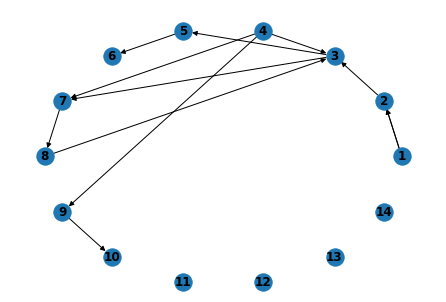

In [47]:
nx.draw_circular(network, with_labels=True, font_weight='bold')

In [48]:
network.edges

OutMultiEdgeView([(1, 2, 0), (1, 2, 1), (2, 3, 0), (3, 5, 0), (3, 7, 0), (4, 3, 0), (4, 9, 0), (4, 7, 0), (5, 6, 0), (7, 8, 0), (8, 3, 0), (9, 10, 0)])

In [59]:
partition = community.best_partition(network.to_undirected())
for node_id in partition:
    network.nodes[node_id]["community"] = partition[node_id]

In [60]:
partition

{1: 1,
 2: 1,
 3: 7,
 4: 7,
 5: 4,
 6: 4,
 7: 7,
 8: 7,
 9: 0,
 10: 0,
 11: 2,
 12: 3,
 13: 5,
 14: 6}

In [62]:
network.nodes[10]

{'community': 0}